In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
##pd.set_option('display.max_rows',None)

In [3]:
movie = pd.read_csv("movies.csv")
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#checking if there's missing values

for col in movie.columns:
    pct_missing = np.mean(movie[col].isnull())
    print('{} - {} %'.format(col,round(pct_missing*100)))

name - 0 %
rating - 1 %
genre - 0 %
year - 0 %
released - 0 %
score - 0 %
votes - 0 %
director - 0 %
writer - 0 %
star - 0 %
country - 0 %
budget - 28 %
gross - 2 %
company - 0 %
runtime - 0 %


In [6]:
movie.gross.isnull().sum()

189

In [7]:
movie.budget.isnull().sum()

2171

In [8]:
movie.rating.isnull().sum()

77

In [9]:
movie_dropped = movie.dropna(subset=['rating'])
movie_dropped.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
movie_dropped['rating'].isnull().sum()

0

In [11]:
movie_dropped.gross.isnull().sum()

166

In [12]:
fil_mean = round(movie_dropped['budget'].mean(),1)
fil_mean

35699409.4

In [13]:
movie_dropped['budget'].fillna(value=fil_mean,inplace=True)

In [14]:
movie_dropped.budget.isnull().sum()

0

In [15]:
gross_mean = round(movie_dropped['gross'].mean(),1)
gross_mean

78895968.8

In [16]:
movie_dropped['gross'].fillna(value=gross_mean,inplace=True)

In [17]:
movie_dropped.gross.isnull().sum()

0

In [18]:
for col in movie_dropped.columns:
    pct_missing = np.mean(movie_dropped[col].isnull())
    print('{} - {} %'.format(col,round(pct_missing*100)))

name - 0 %
rating - 0 %
genre - 0 %
year - 0 %
released - 0 %
score - 0 %
votes - 0 %
director - 0 %
writer - 0 %
star - 0 %
country - 0 %
budget - 0 %
gross - 0 %
company - 0 %
runtime - 0 %


In [19]:
df = movie_dropped.copy()

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<AxesSubplot:>

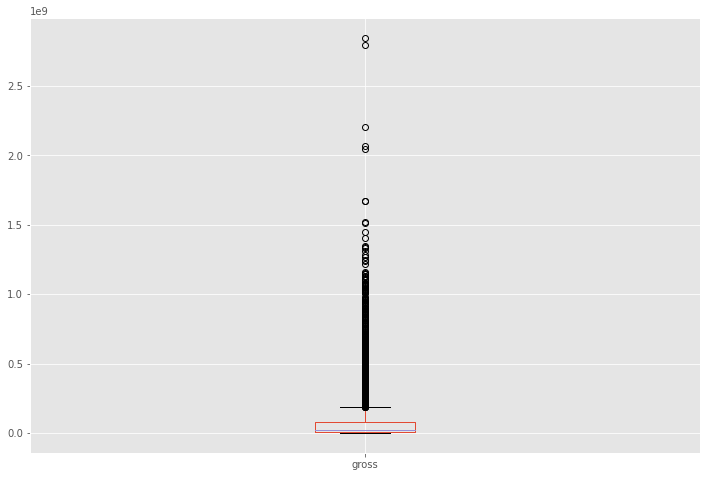

In [22]:
# Are there outliers?
df.boxplot(column=['gross'])

In [23]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,35699409.4,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35699409.4,413378.0,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,78895968.8,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35699409.4,13266.0,Roxwell Films,87.0


In [24]:
#    Order the data to see 
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35699409.4,1.672000e+03,Polygram Filmed Entertainment,87.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35699409.4,1.605000e+03,Balboa Entertainment,110.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35699409.4,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35699409.4,6.820000e+02,Roxwell Films,93.0


<AxesSubplot:xlabel='gross', ylabel='budget'>

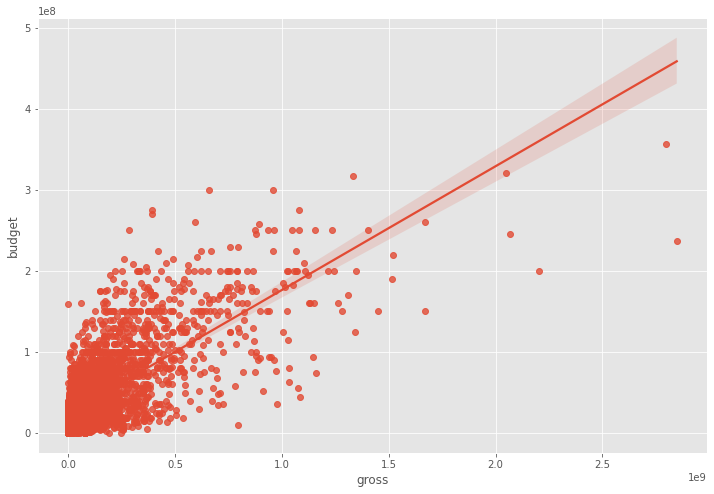

In [25]:
sns.regplot(x='gross',y='budget',data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

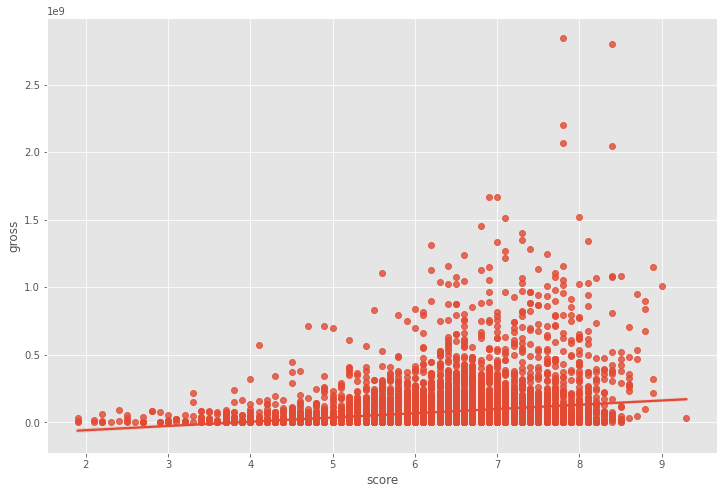

In [26]:
sns.regplot(x='score',y='gross',data=df)

In [27]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.103577,0.227017,0.268470,0.254374,0.121526
score,0.103577,1.000000,0.411973,0.064762,0.185227,0.400949
votes,0.227017,0.411973,1.000000,0.420883,0.629295,0.309664
budget,0.268470,0.064762,0.420883,1.000000,0.712096,0.265685
gross,0.254374,0.185227,0.629295,0.712096,1.000000,0.241864
runtime,0.121526,0.400949,0.309664,0.265685,0.241864,1.000000


In [28]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.071488,0.339628,0.145765,0.185823,0.097637
score,0.071488,1.000000,0.304163,0.002703,0.083451,0.284471
votes,0.339628,0.304163,1.000000,0.165937,0.513173,0.199170
budget,0.145765,0.002703,0.165937,1.000000,0.262473,0.162231
gross,0.185823,0.083451,0.513173,0.262473,1.000000,0.158268
runtime,0.097637,0.284471,0.199170,0.162231,0.158268,1.000000


In [29]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.104660,0.483279,0.204757,0.272228,0.143714
score,0.104660,1.000000,0.433712,0.003548,0.122560,0.401078
votes,0.483279,0.433712,1.000000,0.240847,0.695905,0.291645
budget,0.204757,0.003548,0.240847,1.000000,0.367180,0.228779
gross,0.272228,0.122560,0.695905,0.367180,1.000000,0.231099
runtime,0.143714,0.401078,0.291645,0.228779,0.231099,1.000000


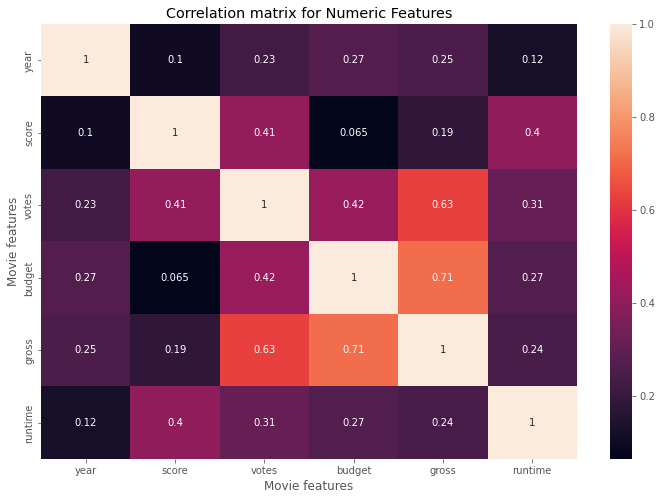

In [30]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [31]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.149634,0.037432,0.965221,0.958468,-0.047555,0.283242,0.744537,0.803101,0.729051,0.141307,0.278551,0.954921,0.589779,0.047933
rating,0.149634,1.000000,-0.088366,0.162248,0.152290,0.012610,0.108336,0.092895,0.110561,0.100946,0.009887,0.191583,0.158416,-0.020687,0.034881
genre,0.037432,-0.088366,1.000000,0.038255,0.036992,-0.003922,0.022474,0.048677,0.037635,0.038276,-0.012194,0.071475,0.038807,0.008235,-0.000055
year,0.965221,0.162248,0.038255,1.000000,0.993169,-0.045861,0.308498,0.769616,0.823385,0.754466,0.138860,0.301061,0.988970,0.599916,0.049720
released,0.958468,0.152290,0.036992,0.993169,1.000000,-0.046539,0.295536,0.769879,0.817949,0.752444,0.146760,0.287315,0.984867,0.606501,0.047548
score,-0.047555,0.012610,-0.003922,-0.045861,-0.046539,1.000000,-0.013051,-0.025176,-0.036227,-0.010584,0.024979,-0.013976,-0.045899,-0.029615,0.026977
votes,0.283242,0.108336,0.022474,0.308498,0.295536,-0.013051,1.000000,0.182769,0.217939,0.171565,-0.047206,0.403503,0.291058,-0.003434,0.108524
director,0.744537,0.092895,0.048677,0.769616,0.769879,-0.025176,0.182769,1.000000,0.746914,0.680145,0.156591,0.109833,0.758777,0.548024,-0.011616
writer,0.803101,0.110561,0.037635,0.823385,0.817949,-0.036227,0.217939,0.746914,1.000000,0.673063,0.155567,0.189164,0.813004,0.543128,0.031761
star,0.729051,0.100946,0.038276,0.754466,0.752444,-0.010584,0.171565,0.680145,0.673063,1.000000,0.180722,0.112125,0.744033,0.523242,0.034585


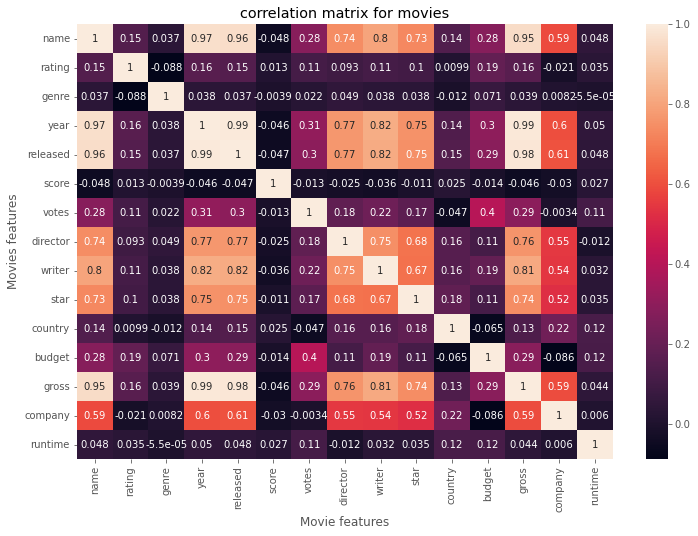

In [32]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("correlation matrix for movies")
plt.xlabel("Movie features")
plt.ylabel("Movies features")
plt.show()

In [33]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name     name        1.000000
         rating      0.149634
         genre       0.037432
         year        0.965221
         released    0.958468
                       ...   
runtime  country     0.122576
         budget      0.118676
         gross       0.044207
         company     0.006016
         runtime     1.000000
Length: 225, dtype: float64


In [34]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

genre    rating    -0.088366
rating   genre     -0.088366
budget   company   -0.085692
company  budget    -0.085692
budget   country   -0.065243
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [35]:
# We can now take a look at the ones that have a high correlation(> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

star     company     0.523242
company  star        0.523242
writer   company     0.543128
company  writer      0.543128
         director    0.548024
                       ...   
year     year        1.000000
genre    genre       1.000000
rating   rating      1.000000
company  company     1.000000
runtime  runtime     1.000000
Length: 71, dtype: float64


In [36]:
# Looking at the top 15 companies by gross revenue
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross',ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted


company
Warner Bros.                 56408075090
Universal Pictures           52593084858
Columbia Pictures            43008941346
Paramount Pictures           40572503383
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19867862616
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9388022042
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [37]:
#df['Year'] = df['released'].astype(str).str[8:12]
#df

In [38]:
df.groupby(['company','year'])[['gross']].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [39]:
CompanyGrossSum = df.groupby(["company","year"])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'],ascending=False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

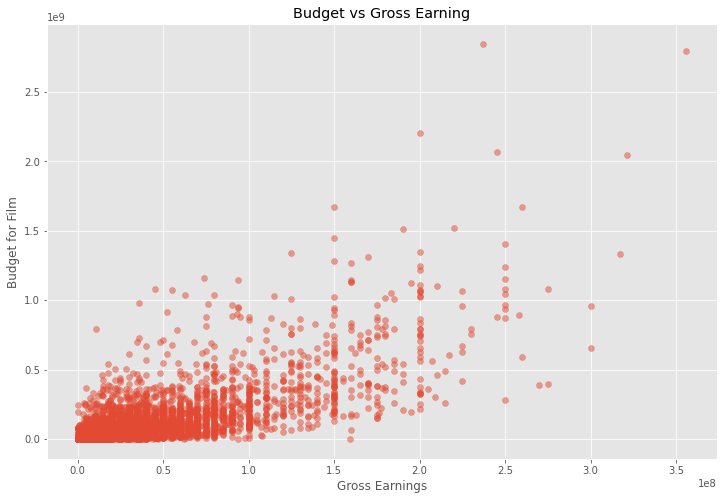

In [40]:
plt.scatter(x=df['budget'], y=df['gross'],alpha=0.5)
plt.title("Budget vs Gross Earning")
plt.xlabel('Gross Earnings')
plt.ylabel("Budget for Film")
plt.show()

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [42]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6520,6,6,1980,1687,8.4,927000.0,2551,3966,1025,54,19000000.0,46998772.0,2277,146.0
1,5511,6,1,1980,1474,5.8,65000.0,2239,1615,316,55,4500000.0,58853106.0,713,104.0
2,5084,4,0,1980,1753,8.7,1200000.0,1095,2538,1713,55,18000000.0,538375067.0,1509,124.0
3,283,4,4,1980,1474,7.7,221000.0,1282,1978,2203,55,3500000.0,83453539.0,1773,88.0
4,1017,6,4,1980,1525,7.3,108000.0,1039,513,398,55,6000000.0,39846344.0,1740,98.0


In [43]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012160,0.015087,0.013595,-0.010712,0.016534,0.013145,0.009598,0.009628,0.006274,-0.010150,0.020882,0.004940,0.009469,0.011381
rating,-0.012160,1.000000,0.118008,0.026158,0.022983,0.011653,0.015314,0.017111,-0.005507,0.006262,0.034004,-0.155595,-0.128933,-0.078886,0.067572
genre,0.015087,0.118008,1.000000,-0.087534,0.030069,0.040403,-0.148201,-0.013460,0.006952,-0.003193,-0.032244,-0.316431,-0.238206,-0.068885,-0.044442
year,0.013595,0.026158,-0.087534,1.000000,-0.003022,0.103577,0.227017,-0.021961,-0.012583,-0.026474,-0.072554,0.268470,0.254374,-0.007445,0.121526
released,-0.010712,0.022983,0.030069,-0.003022,1.000000,0.042887,0.016759,-0.001603,-0.002790,0.017449,-0.020227,0.013007,0.000804,-0.007922,0.000476
score,0.016534,0.011653,0.040403,0.103577,0.042887,1.000000,0.411973,0.008532,0.019215,-0.001055,-0.129806,0.064762,0.185227,0.002757,0.400949
votes,0.013145,0.015314,-0.148201,0.227017,0.016759,0.411973,1.000000,-0.000642,0.000558,-0.020649,0.069400,0.420883,0.629295,0.130770,0.309664
director,0.009598,0.017111,-0.013460,-0.021961,-0.001603,0.008532,-0.000642,1.000000,0.296779,0.037475,0.014573,-0.010564,-0.013902,0.001377,0.017681
writer,0.009628,-0.005507,0.006952,-0.012583,-0.002790,0.019215,0.000558,0.296779,1.000000,0.026886,0.015501,-0.033286,-0.023661,0.004873,-0.004193
star,0.006274,0.006262,-0.003193,-0.026474,0.017449,-0.001055,-0.020649,0.037475,0.026886,1.000000,-0.017564,-0.016993,-0.002406,0.010542,0.009062


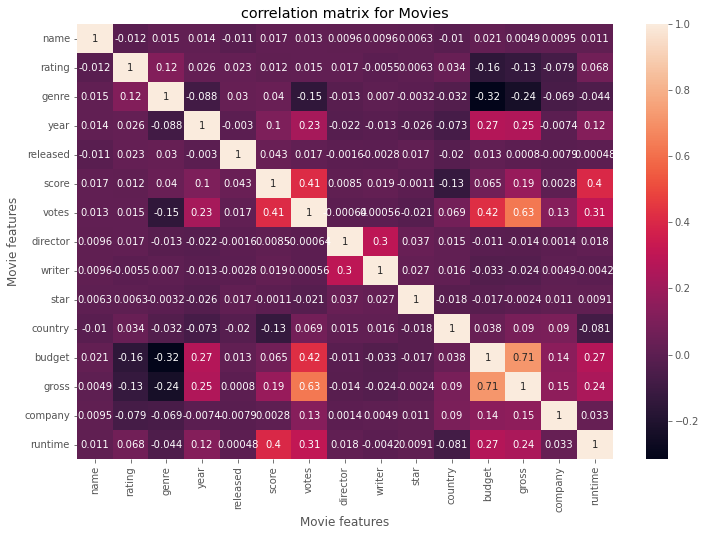

In [44]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [45]:
# Votes and budget have the highest correlation to gross earnings.